### **Q2. med_insurance.csv**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [31]:
df = pd.read_csv('/content/sample_data/med_insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


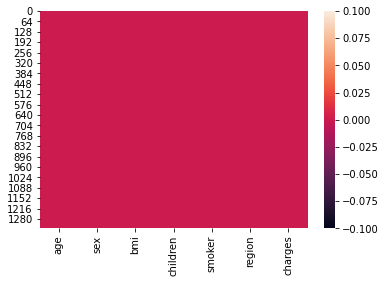

In [34]:
# Checking in Visual if there are any null or NA values
sns.heatmap(df.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


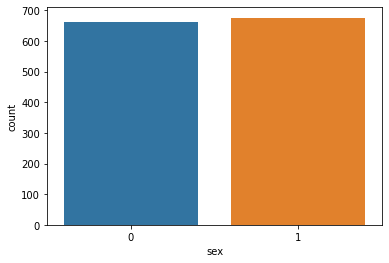

In [60]:
sns.countplot(df['sex'],data=df)

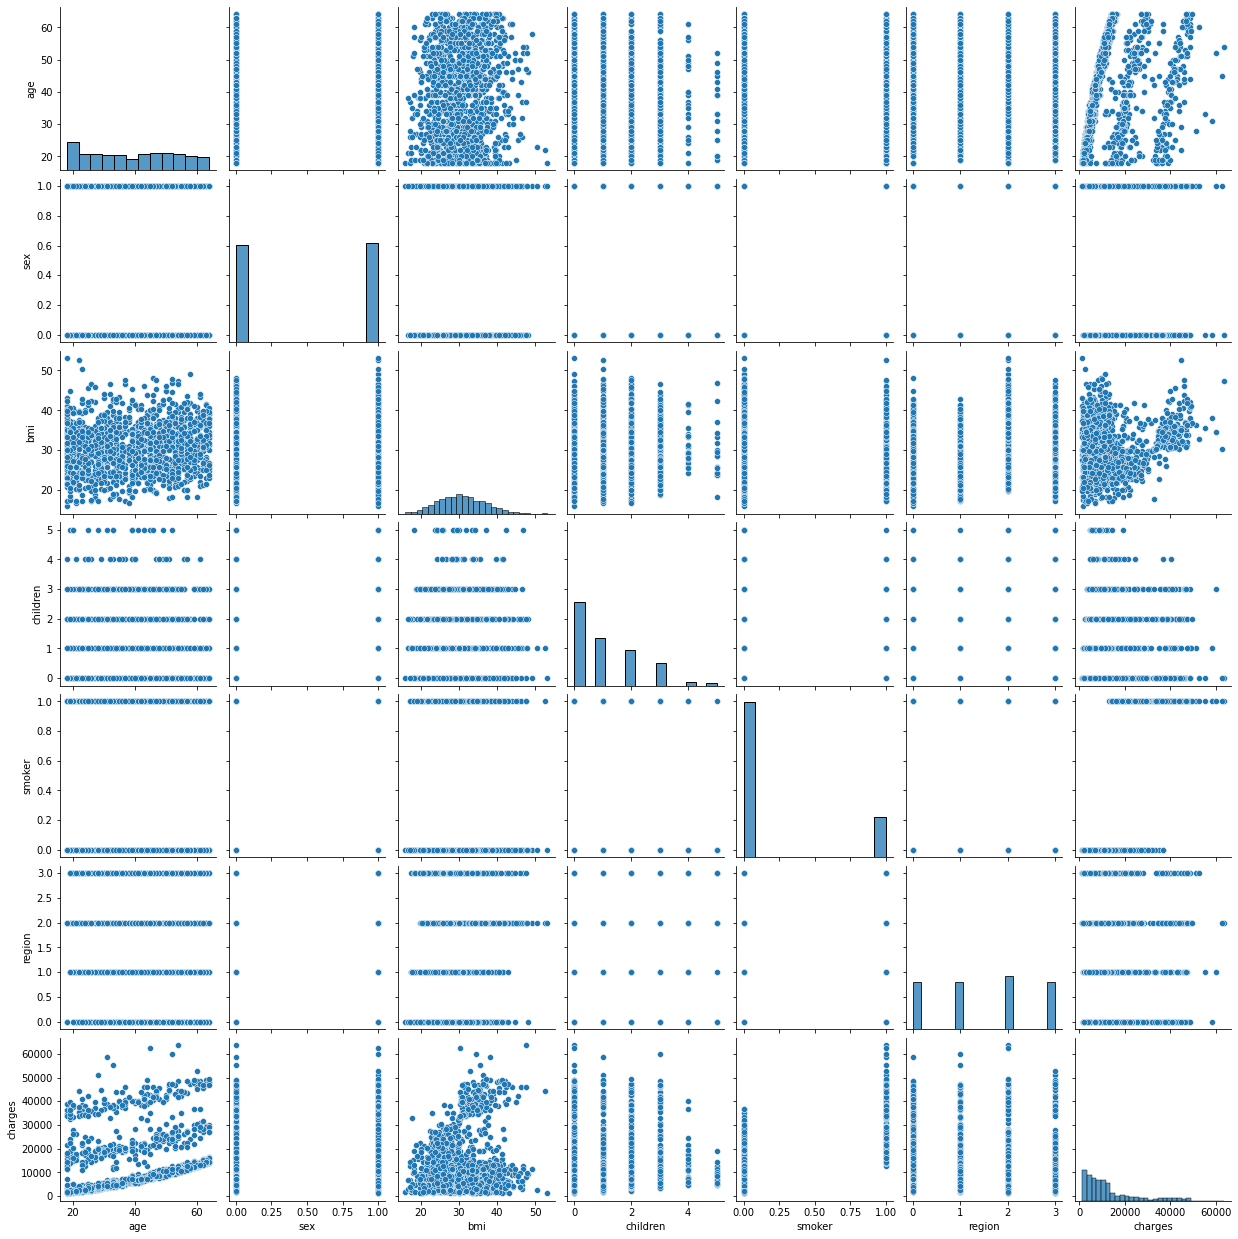

In [61]:
sns.pairplot(df)

In [62]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [63]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [35]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.isna().sum().sum()

0

In [40]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex']) 
df['sex'].unique()

array([0, 1])

In [45]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [47]:
df['smoker']= label_encoder.fit_transform(df['smoker']) 
df['smoker'].unique()

array([1, 0])

In [42]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [48]:
df['region']= label_encoder.fit_transform(df['region']) 
df['region'].unique()

array([3, 2, 1, 0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [50]:
X= df.drop(columns='charges')
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [53]:
y = df['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [54]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = regr.predict(X_test)
y_pred

array([10947.91401491,  9764.82733066, 38027.18625354, 16076.26656375,
        7003.05093861,  4162.38974052,  1745.17453352, 14273.5330135 ,
        9022.7490154 ,  7548.70107263,  4742.33662827, 10290.75344147,
        8592.56051588,  4173.37165612, 27970.0324915 , 11026.04778351,
       11286.00941429,  6197.06911697,  8269.51468144, 27263.01056172,
       33686.9512703 , 14247.8812616 , 11735.79293452, 32419.5578177 ,
        4475.57228648,  9264.65728706,  1336.5408973 , 10083.42064465,
        4134.01766875, 10422.0367284 ,  9033.04363126, 40177.36502272,
       15327.89185262, 13541.84076855, 24979.41529438,  5273.0794857 ,
       12809.44891047, 30538.99654744, 33503.98483751,  3477.84775709,
        4169.03343497,  4346.93367013, 30642.90398321, 39366.95813634,
       28066.36347631,  5110.98142166, 10919.49675465,  7870.63024919,
        3790.77872548, 10529.86942143,  5758.50260778,  3526.36470247,
       32837.53966438, 38431.60954739, 16119.53210068,  7198.88399648,
      

In [68]:
regr.coef_

array([ 2.50537556e+02,  3.65092141e+00,  3.22881906e+02,  4.50147445e+02,
        2.36021161e+04, -3.41244000e+02])

In [70]:
regr.intercept_

-11261.13882516395

In [56]:
dfpred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfpred

,Actual,Predicted
0,9724.53000,10947.914015
1,8547.69130,9764.827331
2,45702.02235,38027.186254
3,12950.07120,16076.266564
4,9644.25250,7003.050939
...,...,...
330,13224.05705,14993.031723
331,4433.91590,6934.890107
332,9377.90470,10983.730535
333,3597.59600,6810.504924


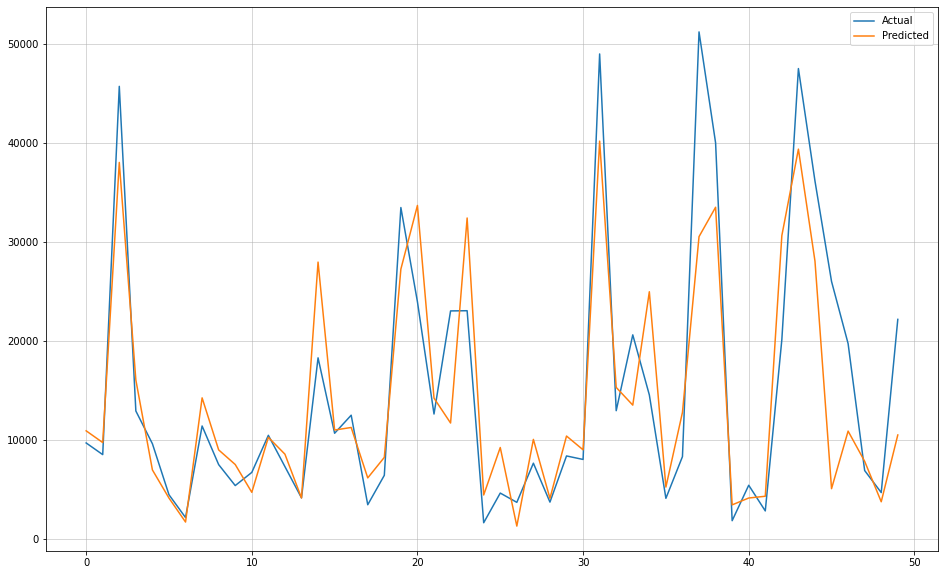

In [57]:
dfpred.head(50).plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("RootMean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error 3998.2715408869726
Mean Squared Error 32073628.560109198
RootMean Squared Error 5663.358417062193


In [64]:
df = pd.DataFrame({'Actual Data ':y_test,'Predicted Data':y_pred})
df

,Actual Data,Predicted Data
0,9724.53000,10947.914015
1,8547.69130,9764.827331
2,45702.02235,38027.186254
3,12950.07120,16076.266564
4,9644.25250,7003.050939
...,...,...
330,13224.05705,14993.031723
331,4433.91590,6934.890107
332,9377.90470,10983.730535
333,3597.59600,6810.504924


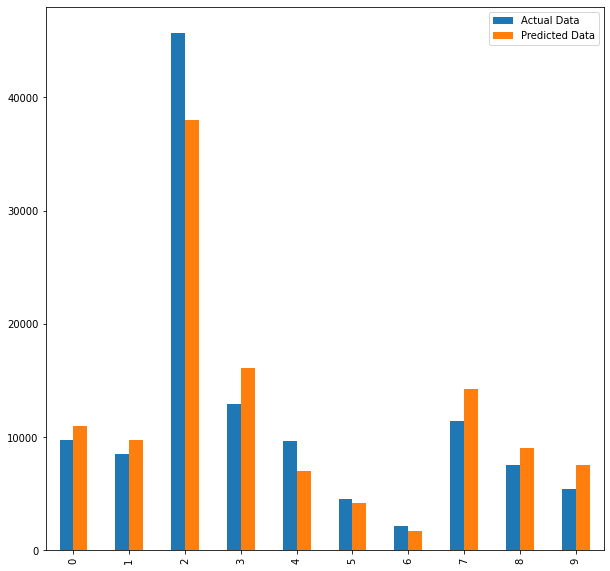

In [65]:
df = df.head(10)
df.plot(kind='bar',figsize=(10,10))
plt.show()